In [1]:
import numpy as np
from scipy import stats
import seaborn as sns
from pylab import*
from math import*
import numpy as np
%matplotlib inline
from pylab import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from scipy import stats
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [20]:
x = 10.8
#print math.floor(x)

In [2]:
straight_xy= np.array([ 
            [10.50, 27.00],
            [10.85,27.05],
            [10.40,27.00],
            [10.20,27.20],
            [10.40,27.10],
            [10.50,27.00],
            [11.20,27.00],
            [10.125,27.00],
            [10.90,27.00],
            [10.125,27.00],
            [10.00,27.00],
            [10.30,27.00],
            [10.25,27.00],
            [10.625,27.00],
            [9.875,27.00],
            [10.50,27.00],
            [9.85,27.00],
            [9.75,27.00],
            [10.50,27.00],
            [9.50,27.00]])

whole = np.zeros((straight_xy.shape[0], straight_xy.shape[1]))
decimal = np.zeros((straight_xy.shape[0], straight_xy.shape[1]))
for i in range(straight_xy.shape[0]):
    for j in range(straight_xy.shape[1]):
        whole[i][j] = math.floor(straight_xy[i][j])
        decimal[i][j] = straight_xy[i][j] - int(straight_xy[i][j])
whole_cms = 2.5*whole
decimal_cms = 2.54*decimal
new_straight = whole_cms+decimal_cms
print (new_straight)

new_straight = np.sort(new_straight, axis = 0)


[[ 26.27    67.5   ]
 [ 27.159   67.627 ]
 [ 26.016   67.5   ]
 [ 25.508   68.008 ]
 [ 26.016   67.754 ]
 [ 26.27    67.5   ]
 [ 28.008   67.5   ]
 [ 25.3175  67.5   ]
 [ 27.286   67.5   ]
 [ 25.3175  67.5   ]
 [ 25.      67.5   ]
 [ 25.762   67.5   ]
 [ 25.635   67.5   ]
 [ 26.5875  67.5   ]
 [ 24.7225  67.5   ]
 [ 26.27    67.5   ]
 [ 24.659   67.5   ]
 [ 24.405   67.5   ]
 [ 26.27    67.5   ]
 [ 23.77    67.5   ]]


In [3]:
def dist(array, startx, starty):
    dist =[]
    for x,y in array:
        dist.append(np.sqrt((x-startx)**2+(y-starty)**2))
    return dist

In [9]:
def compute_all(startx=26.27 ,starty=0.0, plot_title='Straight Motion', xlimit=[-1,70], ylimit=[-1,70], 
                motion_arr=new_straight, zoom_ax=[23, 29, 67, 69] ):
    fig ,axes = subplots(1, figsize=(8,8))
#     startx=26.27
#     starty=0.0
    title(plot_title)
    xlabel('X- cm')
    ylabel('Y- cm')
    xlim(xlimit[0],xlimit[1])
    ylim(ylimit[0],ylimit[1])
    yscale('linear')
    xscale('linear')
    end_xy = motion_arr
#plot(end_xy[:,0],end_xy[:,1])
    axes.grid(color='g', linestyle='--', linewidth=1)
    axes.scatter(startx,starty, color='r', marker='*')

    axins = zoomed_inset_axes(axes, 4, loc=5)

    axins.invert_xaxis()
    axins.axis(zoom_ax)
    axins.xaxis.tick_top()
    mark_inset(axes, axins, loc1=2, loc2=4, fc="black",lw=0.5, ec='black')

#axes[0].step(10.75,9.50, color='r')
    axes.scatter(end_xy[:,0],end_xy[:,1],marker='+')
    axes.scatter(end_xy[:,0].mean(),end_xy[:,1].mean(), marker='*', color='black')
    scatter(end_xy[:,0],end_xy[:,1],marker='+')
    scatter(end_xy[:,0].mean(),end_xy[:,1].mean(), marker='*', color='black')
#axes.annotate(r'stop', xy=(.6,.15), color='#0c1799')
    print ("Mean X",end_xy[:,0].mean())
    print ("Mean Y",end_xy[:,1].mean())

    print ("std X",end_xy[:,0].std())
    print ("std Y",end_xy[:,1].std())

    print ("X ----range>>>",end_xy[:,0].min() ,"-",end_xy[:,0].max())
    print ("Y ----range>>>",end_xy[:,1].min() ,"-",end_xy[:,1].max())

    distance = dist(end_xy,startx,starty )
    distance= np.asarray(distance)
    print ("mean traveled distance : ",distance.mean())
    print ("max traveled distance : ",distance.max())
    print ("min traveled distance : ",distance.min())
#     figname=concat(plot_title.split(" ")[0],".png")
    savefig(filename=plot_title.split(" ")[0]+".png", dpi=None, facecolor='w', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=True, bbox_inches=None, pad_inches=0.1,
        frameon=None)

In [81]:
def compute_all_with_theta(startx=26.27 ,starty=0.0, plot_title='Straight Motion', xlimit=[-1,70], ylimit=[-1,70], 
                motion_arr=new_straight, zoom_ax=[23, 29, 67, 69], theta=None ):
    fig ,axes = subplots(1, figsize=(8,8))
#     startx=26.27
#     starty=0.0
    title(plot_title)
    xlabel('X- cm')
    ylabel('Y- cm')
    xlim(xlimit[0],xlimit[1])
    ylim(ylimit[0],ylimit[1])
    yscale('linear')
    xscale('linear')
    end_xy = motion_arr
#plot(end_xy[:,0],end_xy[:,1])
    axes.grid(color='g', linestyle='--', linewidth=1)
    axes.scatter(startx,starty, color='r', marker=(3,0,0))

    axins = zoomed_inset_axes(axes, 4, loc=5)

    axins.invert_xaxis()
    axins.axis(zoom_ax)
    axins.xaxis.tick_top()
    mark_inset(axes, axins, loc1=2, loc2=4, fc="black",lw=0.5, ec='black')

#axes[0].step(10.75,9.50, color='r')
    for i in range(20):
        axes.scatter(end_xy[i,0],end_xy[i,1],marker=(3,0,theta[i]+0),s=20)
#     axes.scatter(end_xy[:,0],end_xy[:,1],marker=(3,0,theta[:]))
    axes.scatter(end_xy[:,0].mean(),end_xy[:,1].mean(), marker='*', color='black')
    for i in range(20):
        scatter(end_xy[i,0],end_xy[i,1],marker=(3,0,theta[i]+0), s=80)
#     scatter(end_xy[:,0],end_xy[:,1],marker='+')
    scatter(end_xy[:,0].mean(),end_xy[:,1].mean(), marker=(3,0,theta.mean()+0), s=100, color='black')
#axes.annotate(r'stop', xy=(.6,.15), color='#0c1799')
    print ("Mean X",end_xy[:,0].mean())
    print ("Mean Y",end_xy[:,1].mean())

    print ("std X",end_xy[:,0].std())
    print ("std Y",end_xy[:,1].std())

    print ("X ----range>>>",end_xy[:,0].min() ,"-",end_xy[:,0].max())
    print ("Y ----range>>>",end_xy[:,1].min() ,"-",end_xy[:,1].max())

    distance = dist(end_xy,startx,starty )
    distance= np.asarray(distance)
    print ("mean traveled distance : ",distance.mean())
    print ("max traveled distance : ",distance.max())
    print ("min traveled distance : ",distance.min())
#     figname=concat(plot_title.split(" ")[0],".png")
    savefig(filename=plot_title.split(" ")[0]+".png", dpi=None, facecolor='w', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=True, bbox_inches=None, pad_inches=0.1,
        frameon=None)

In [12]:
def compute_theta(array):
    
    right_theta=[]
    for x,y in array:
        right_theta.append(np.rad2deg(np.arctan(y/x)))
    print (right_theta)
    right_theta= np.asarray(right_theta)
    print ("mean",right_theta.mean())
    print ("std",right_theta.std())
    print ("Min Max", right_theta.min(), right_theta.max())
    return right_theta
#     fig ,axes = subplots(1, figsize=(8,8))
    #axes.grid(color='g', linestyle='--', linewidth=1)
#     plot(right_theta)
# axes.scatter(right_theta, color='r', marker='*')
#     np.savetxt("rightT.csv", right_theta)
    
def convert_cm(old_array):
    right_xy=old_array
    whole = np.zeros((right_xy.shape[0], right_xy.shape[1]))
    decimal = np.zeros((right_xy.shape[0], right_xy.shape[1]))
    for i in range(right_xy.shape[0]):
        for j in range(right_xy.shape[1]):
            whole[i][j] = math.floor(right_xy[i][j])
            decimal[i][j] = right_xy[i][j] - int(right_xy[i][j])

    whole_cms = 2.5*whole
    decimal_cms = 2.54*decimal
    new_right = whole_cms+decimal_cms
    new_array = np.sort(new_right, axis = 0)
    return new_array

Mean X 25.81245
Mean Y 67.54445
std X 1.00681842827
std Y 0.122309637805
X ----range>>> 23.77 - 28.008
Y ----range>>> 67.5 - 68.008
mean traveled distance :  67.5534975755
max traveled distance :  68.0302043801
min traveled distance :  67.5


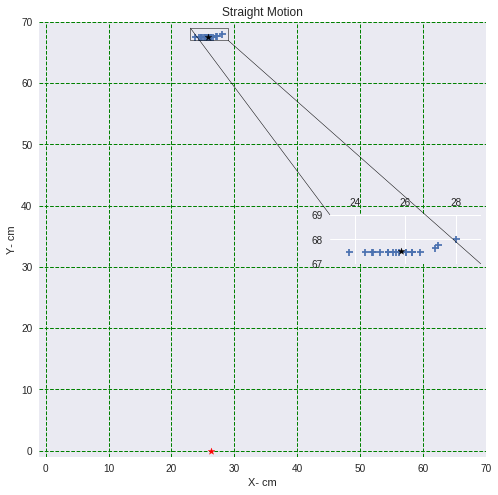

In [6]:
compute_all()
# plot_title='Straight Motion'
# x= plot_title.split(" ")[0]
# figname=format(plot_title.split(" ")[0]+".png")
# figname
# # str.strip(plot_title," " )

In [10]:
right_theta=np.array([[5.0,4.8],
         [3.2,2.7],
         [5.9,5.2],
          [4.7,4.2],
          [4.1,3.5],
          [4.6,4.1],
          [4.5,4.4],
          [4.8,4.3],
          [3.7,3.1 ],
          [4.1,3.4],
          [4.2, 3.7],
          [4.8, 3.5],
            [3.9,3.3],
            [4.2, 3.7],
            [4.0, 3.4],
            [4.6, 3.9],
            [4.3, 3.4],
            [5.1, 4.4],
            [4.7, 3.6],
            [4.4, 3.7]])
right_xy =np.array([[15.7,23.59],
                   [15.59,23.59],
                    [15.59,23.59],
                    [15.4,23.7],
                    [16.0,23.23],
                    [15.59,23.59],
                   [16.,23.23],
                    [15.7,23.23],
                    [15.9,23.23],
                    [15.,23.9],
                    [15.,23.9],
                    [15.86,23.27],
                    [15.66,23.3],
                    [15.39,23.59],
                    [16.,23.23],
                    [15.19,23.7],
                    [15.86,23.27],
                    [15.19,23.7],
                    [15.66,23.3],
                    [15.19,23.9]
                   ])
whole = np.zeros((right_xy.shape[0], right_xy.shape[1]))
decimal = np.zeros((right_xy.shape[0], right_xy.shape[1]))
for i in range(right_xy.shape[0]):
    for j in range(right_xy.shape[1]):
        whole[i][j] = math.floor(right_xy[i][j])
        decimal[i][j] = right_xy[i][j] - int(right_xy[i][j])

whole_cms = 2.5*whole
decimal_cms = 2.54*decimal
new_right = whole_cms+decimal_cms
print(new_right)

new_right = np.sort(new_right, axis = 0)

[[ 39.278   58.9986]
 [ 38.9986  58.9986]
 [ 38.9986  58.9986]
 [ 38.516   59.278 ]
 [ 40.      58.0842]
 [ 38.9986  58.9986]
 [ 40.      58.0842]
 [ 39.278   58.0842]
 [ 39.786   58.0842]
 [ 37.5     59.786 ]
 [ 37.5     59.786 ]
 [ 39.6844  58.1858]
 [ 39.1764  58.262 ]
 [ 38.4906  58.9986]
 [ 40.      58.0842]
 [ 37.9826  59.278 ]
 [ 39.6844  58.1858]
 [ 37.9826  59.278 ]
 [ 39.1764  58.262 ]
 [ 37.9826  59.786 ]]


[40.244696345659982, 39.886869185217286, 40.173309333882955, 40.417715613678745, 39.709806699429791, 39.709806699429791, 39.848449925408246, 39.848449925408246, 39.980029860601981, 40.105071576782898, 39.462835757213973, 38.83762467404857, 40.337393262302044, 41.043032890074137, 41.738444522083789, 41.810981662041179, 42.47592635344585, 41.389082482781667, 43.331483160711933, 41.339739704132178]
mean 40.5845374817
std 1.09009209579
Min Max 38.837624674 43.3314831607
Mean X 38.95069
Mean Y 58.77508
std X 0.800682010476
std Y 0.61976
X ----range>>> 37.5 - 40.0
Y ----range>>> 58.0842 - 59.786
mean traveled distance :  66.6623082493
max traveled distance :  68.0486281713
min traveled distance :  65.3741102398


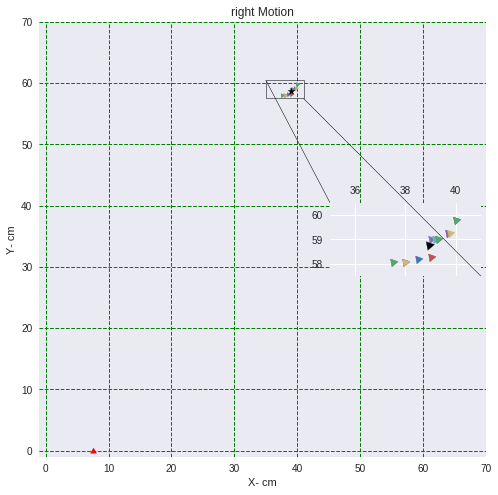

In [82]:
compute_all_with_theta(startx=7.5 ,starty=0.0, plot_title='right Motion', xlimit=[-1,70], ylimit=[-1,70], 
                motion_arr=new_right, zoom_ax=[35, 41, 57.5, 60.5], theta= compute_theta( convert_cm(right_theta) ))

In [23]:
# for right 
compute_theta( convert_cm(right_theta) )

[40.244696345659982, 39.886869185217286, 40.173309333882955, 40.417715613678745, 39.709806699429791, 39.709806699429791, 39.848449925408246, 39.848449925408246, 39.980029860601981, 40.105071576782898, 39.462835757213973, 38.83762467404857, 40.337393262302044, 41.043032890074137, 41.738444522083789, 41.810981662041179, 42.47592635344585, 41.389082482781667, 43.331483160711933, 41.339739704132178]
mean 40.5845374817
std 1.09009209579
Min Max 38.837624674 43.3314831607


array([ 40.24469635,  39.88686919,  40.17330933,  40.41771561,
        39.7098067 ,  39.7098067 ,  39.84844993,  39.84844993,
        39.98002986,  40.10507158,  39.46283576,  38.83762467,
        40.33739326,  41.04303289,  41.73844452,  41.81098166,
        42.47592635,  41.38908248,  43.33148316,  41.3397397 ])

In [60]:
left_theta=np.array([[3.4,3.7],
               [2.0,2.1],
               [1.8,1.8],
               [4.0,3.9],
               [1.6,1.7],
               [1.5,1.6],
               [2.5,2.9],
               [4.0,4.0],
               [3.7,3.8],
               [2.1,2.2],
               [2.4,2.7],
               [3.3,3.0],
               [3.1,2.8],
               [2.7,2.5],
               [4.0,3.9],
               [2.5,2.9],
               [2.9,3.0],
               [3.3,3.4],
               [2.9,3.1],
               [3.1, 2.9]
              ])
left_xy= np.array([[4.2,22.9],
                   [3.5,22.5],
                   [4.25,22.9],
                   [3.1,22.25],
                   [3.62,22.5],
                   [4.00,22.75],
                   [3.7,22.6],
                   [4.2,22.8],
                   [4.25,23],
                   [4.85,22.75],
                   [4.1,22.85]
                   ,[4.0,22.75],
                   [4.05,22.8]
                   ,[4.375,22.9],
                   [4.2,22.9],
                   [4.1,22.8],
                   [4.25,22.9],
                   [3.4,22.5],
                   [4.2,22.8],
                   [4.15,22.65]
                   ])
whole = np.zeros((left_xy.shape[0], left_xy.shape[1]))
decimal = np.zeros((left_xy.shape[0], left_xy.shape[1]))
for i in range(left_xy.shape[0]):
    for j in range(left_xy.shape[1]):
        whole[i][j] = math.floor(left_xy[i][j])
        decimal[i][j] = left_xy[i][j] - int(left_xy[i][j])

whole_cms = 2.5*whole
decimal_cms = 2.54*decimal
new_left = whole_cms+decimal_cms
print (new_left)

new_left = np.sort(new_left, axis = 0)

[[ 10.508   57.286 ]
 [  8.77    56.27  ]
 [ 10.635   57.286 ]
 [  7.754   55.635 ]
 [  9.0748  56.27  ]
 [ 10.      56.905 ]
 [  9.278   56.524 ]
 [ 10.508   57.032 ]
 [ 10.635   57.5   ]
 [ 12.159   56.905 ]
 [ 10.254   57.159 ]
 [ 10.      56.905 ]
 [ 10.127   57.032 ]
 [ 10.9525  57.286 ]
 [ 10.508   57.286 ]
 [ 10.254   57.032 ]
 [ 10.635   57.286 ]
 [  8.516   56.27  ]
 [ 10.508   57.032 ]
 [ 10.381   56.651 ]]


In [61]:
# for left 
compute_theta( convert_cm(left_theta) )[19]
left_xy.shape


[46.866561355820011, 46.752419862179821, 45.0, 46.418973329729731, 46.352018835246696, 46.184360665428962, 47.229580243154835, 48.27858376989257, 47.068658106485323, 45.0, 45.0, 44.046034929820024, 44.046034929820024, 43.18328539565244, 45.867327235710952, 47.452103244119776, 45.773643994571664, 44.380328578762338, 44.380328578762338, 45.0]
mean 45.7140121528
std 1.32012355211
Min Max 43.1832853957 48.2785837699


(20, 2)

[46.866561355820011, 46.752419862179821, 45.0, 46.418973329729731, 46.352018835246696, 46.184360665428962, 47.229580243154835, 48.27858376989257, 47.068658106485323, 45.0, 45.0, 44.046034929820024, 44.046034929820024, 43.18328539565244, 45.867327235710952, 47.452103244119776, 45.773643994571664, 44.380328578762338, 44.380328578762338, 45.0]
mean 45.7140121528
std 1.32012355211
Min Max 43.1832853957 48.2785837699
Mean X 10.072865
Mean Y 56.8776
std X 0.9521437687
std Y 0.459679170727
X ----range>>> 7.754 - 12.159
Y ----range>>> 55.635 - 57.5
mean traveled distance :  64.2790553779
max traveled distance :  64.4791063524
min traveled distance :  63.8856109073


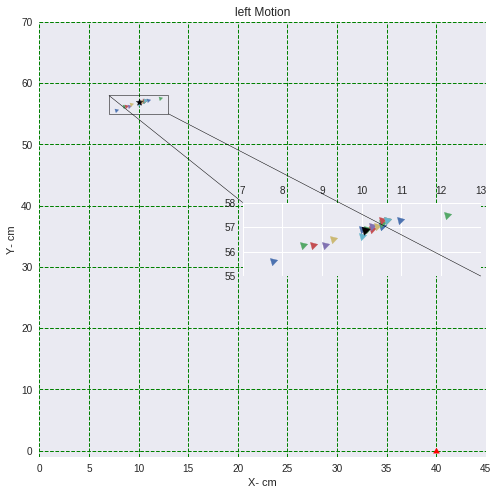

In [83]:
compute_all_with_theta(startx=40 ,starty=0.0, plot_title='left Motion', xlimit=[0,45], ylimit=[-1,70], 
                motion_arr=new_left, zoom_ax=[7, 13, 55, 58], theta= compute_theta( convert_cm(left_theta) ))

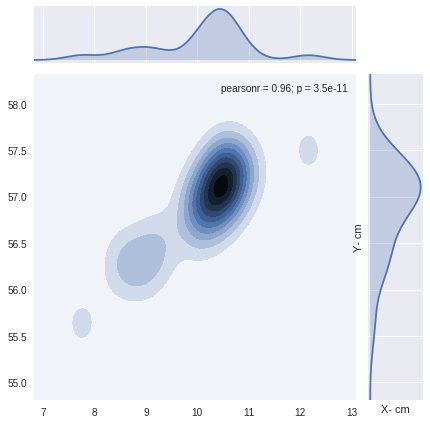

In [92]:

sns.jointplot(new_left[:,  0],new_left[:,  1], kind = 'kde', xscale='cm' , xlabel='X- cm', ylabel='Y-cm' )
#2D density plot for left turn
xlabel('X- cm')
ylabel('Y- cm')


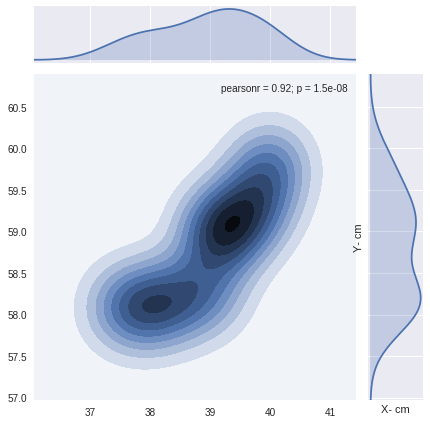

In [93]:
sns.jointplot(new_right[:,  0],new_right[:,  1], kind = 'kde')
#2D density plot for right turn
xlabel('X- cm')
ylabel('Y- cm')

/home/chetan/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/home/chetan/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/home/chetan/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/_kernel_base.py:514: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/home/chetan/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/contour.py:1514: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/chetan/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/contour.py:1515: UserWarning: Warning: converting a masked element 

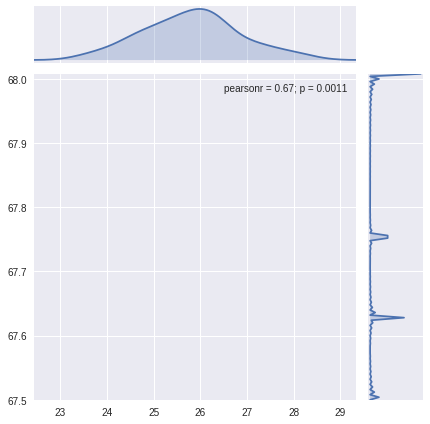

TypeError: only integer scalar arrays can be converted to a scalar index

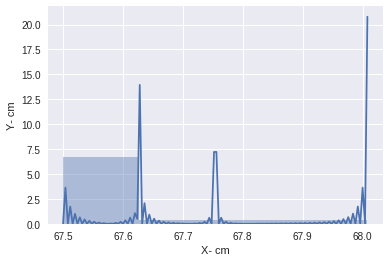

In [96]:
sns.jointplot(new_straight[:,  0],new_straight[:,  1], kind = 'kde')
show()
sns.distplot(new_straight[: , 1])
xlabel('X- cm')
ylabel('Y- cm')
data= np.concatenate((new_straight[:,0],new_left[:,0]), new_right[:,0])
# d2 = np.concatenate((new_straight, new_left, new_right), 0)
# data =
plt.boxplot((new_straight[:,0],new_left[:,0]), new_right[:,0])
#2D density plot for straight motion


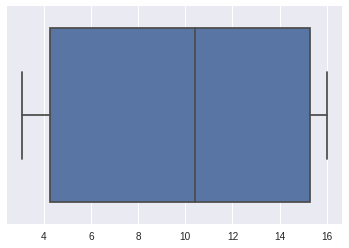

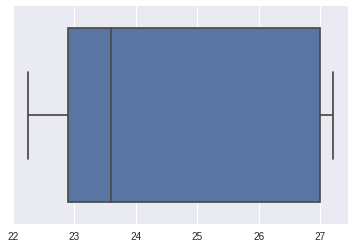

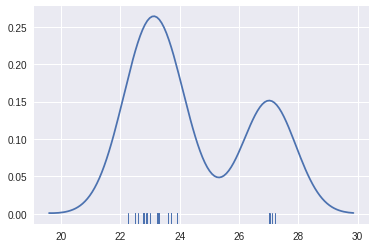

In [34]:
samples = np.concatenate((straight_xy, left_xy, right_xy))
sns.boxplot(samples[:, 0])
show()
sns.boxplot(samples[:, 1])
show()
sns.distplot(samples[:, 1], hist=False, rug=True)

In [35]:
ks , p = stats.normaltest(straight_xy)
alpha = 1e-3

if p.all() < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis cannot be rejected


In [36]:
ks , p = stats.normaltest(right_xy)
alpha = 1e-3

if p.all() < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis cannot be rejected


In [37]:
ks , p = stats.normaltest(left_xy)
alpha = 1e-3

if p.all() < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis cannot be rejected


/home/chetan/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


In [38]:
samples

array([[ 10.5  ,  27.   ],
       [ 10.85 ,  27.05 ],
       [ 10.4  ,  27.   ],
       [ 10.2  ,  27.2  ],
       [ 10.4  ,  27.1  ],
       [ 10.5  ,  27.   ],
       [ 11.2  ,  27.   ],
       [ 10.125,  27.   ],
       [ 10.9  ,  27.   ],
       [ 10.125,  27.   ],
       [ 10.   ,  27.   ],
       [ 10.3  ,  27.   ],
       [ 10.25 ,  27.   ],
       [ 10.625,  27.   ],
       [  9.875,  27.   ],
       [ 10.5  ,  27.   ],
       [  9.85 ,  27.   ],
       [  9.75 ,  27.   ],
       [ 10.5  ,  27.   ],
       [  9.5  ,  27.   ],
       [  4.2  ,  22.9  ],
       [  3.5  ,  22.5  ],
       [  4.25 ,  22.9  ],
       [  3.1  ,  22.25 ],
       [  3.62 ,  22.5  ],
       [  4.   ,  22.75 ],
       [  3.7  ,  22.6  ],
       [  4.2  ,  22.8  ],
       [  4.25 ,  23.   ],
       [  4.85 ,  22.75 ],
       [  4.1  ,  22.85 ],
       [  4.   ,  22.75 ],
       [  4.05 ,  22.8  ],
       [  4.375,  22.9  ],
       [  4.2  ,  22.9  ],
       [  4.1  ,  22.8  ],
       [  4.25 ,  22.9  ],
 

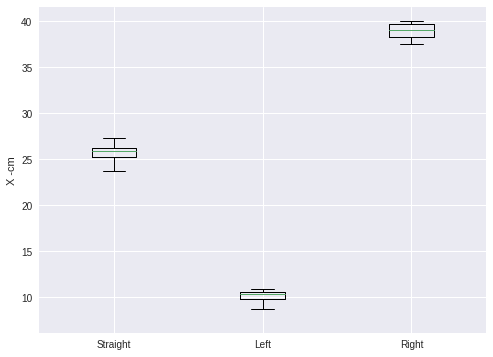

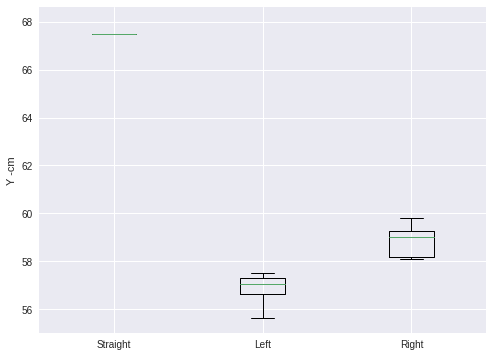

In [122]:
import matplotlib.pyplot as plt
import numpy as np


dataY = [new_straight[:,0]  ,new_left[:,0], new_right[:,0] ]
dataX = [new_straight[:,1]  ,new_left[:,1], new_right[:,1] ]
# data = [data, d2, d2[::2, 0]]
# multiple box plots on one figure

plt.figure(figsize=(8,6))
plt.boxplot(dataY, labels=['Straight', 'Left', 'Right'])
ylabel('X -cm')
plt.show()

plt.figure(figsize=(8,6))
plt.boxplot(dataX, labels=['Straight', 'Left', 'Right'])
ylabel('Y -cm')
plt.show()


In [104]:
done 
- too many significant digits --> single significant 
- same axes scales --> for 20 iteration figures
- visualize orientation on the plots --> only for left and right
- comment about estimation error--> ?????? 
- estimated uncertainty--> ?????
- add image of how we calculated the angle(provided by sushma) --> added

AttributeError: 'list' object has no attribute 'size'